**Load & Processing Phase**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving imdb_datas.xlsx to imdb_datas (3).xlsx


In [ ]:
import pandas as pd
import io
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import io
df= pd.read_excel(io.BytesIO(uploaded['imdb_datas.xlsx']))
df.head()

,type,review,label,file,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# keep only label and file column
new_df = df[['label','file']]
# rename label -> review, file -> sentiment
new_df = new_df.rename(columns={'label':'review', 'file':'sentiment'})
new_df.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [ ]:
# get the cound of records per class
# observed that dataset is un-balanced
count = new_df['sentiment'].value_counts()
print(count)

unsup    42933
neg      21472
pos      21290
Name: sentiment, dtype: int64


In [ ]:
#Summary of the dataset
new_df.describe()

,review,sentiment
count,99998,85695
unique,98460,3
top,"Am not from America, I usually watch this show...",unsup
freq,6,42933


In [ ]:
# try to balance the dataset

# get all positive reviews
pos_df = new_df.loc[new_df['sentiment'] == 'pos']
# get all negative reviews
neg_df = new_df.loc[new_df['sentiment'] == 'neg']
# get all unsup / neutral reviews
unsup_df = new_df.loc[new_df['sentiment'] == 'unsup']

# choose randomly 22933 from unsup reviews
unsup_sample_df = unsup_df.sample(n = 22933)

# concatenated dataframe. Now the dataset is balanced
new_sample_df = pd.concat([pos_df, neg_df, unsup_sample_df], ignore_index=True)
new_sample_df

,review,sentiment
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,"I saw this film in a sneak preview, and it is ...",pos
3,Bill Paxton has taken the true story of the 19...,pos
4,"Maybe I'm reading into this too much, but I wo...",pos
...,...,...
65690,The film opens with one of the truly extraordi...,unsup
65691,"I didn't know this film-maker, Reygadas promis...",unsup
65692,This is one of the sweetest movies I have ever...,unsup
65693,"To get it right, that is. The best film in the...",unsup


In [ ]:
unsup_sample_df

,review,sentiment
99380,"This movie left me with many questions, and wa...",unsup
67735,I had four main impressions of this film on le...,unsup
63642,"""Suddenly"" takes it's name from the small west...",unsup
66101,I'm a longtime fan of The Destroyer series. I ...,unsup
53998,"On paper, Nikita doesn't sound to promising. I...",unsup
...,...,...
56867,The film opens with one of the truly extraordi...,unsup
96293,"I didn't know this film-maker, Reygadas promis...",unsup
62658,This is one of the sweetest movies I have ever...,unsup
52903,"To get it right, that is. The best film in the...",unsup


In [ ]:
# get value counts in the balanced dataframe
count = new_sample_df['sentiment'].value_counts()
print(count)

unsup    22933
neg      21472
pos      21290
Name: sentiment, dtype: int64


In [ ]:
## imports kai file = sentiment
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

In [ ]:
# get unique values
new_sample_df['sentiment'].unique()

array(['pos', 'neg', 'unsup'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


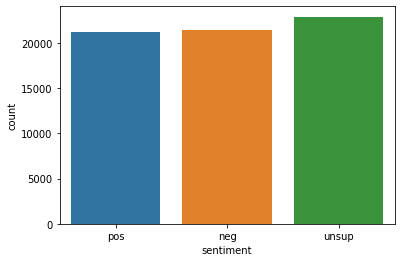

In [ ]:
# get countplot that demonstrates the number of records per class
sns.countplot(new_sample_df['sentiment'])

In [ ]:
# split training dataset procedure
# shuffle the dataset
shuffled_dataset = shuffle(new_sample_df)

# set the train dataset size to 60000
train_dataset_size = 60000

# train dataset
train_df = shuffled_dataset[:train_dataset_size]

# test dataset is almost the 10% of the train dataset
#test dataset
test_df = shuffled_dataset[train_dataset_size:]

In [ ]:
train_df.shape

(60000, 2)

In [ ]:
test_df.shape

(5695, 2)

In [ ]:
# Load stop-words
stopword_list=nltk.corpus.stopwords.words('english')
# initialize Regex-tokenizer with regular expression to keep only words
my_tokenizer = RegexpTokenizer(r'\w+')

label_encoding_dict = {'pos': 0, 'neg': 1, 'unsup': 2}

# function that pre-process review text
def review_processing(review_text):
  #transforms review text to lower
  lower_case_text = review_text.lower()
  # tokenize text to words
  tokenized_text = my_tokenizer.tokenize(lower_case_text)
  # keep only words that are not english stopwords
  filtered_tokens = [token for token in tokenized_text if token not in stopword_list]
  # create filtered text
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

# this function transforms the review label to number accordinf to this dict {'pos': 0, 'neg': 1, 'unsup': 2}
def tranform_review_label(review_label):
  return label_encoding_dict[review_label]

In [ ]:
# apply pre-processing to train dataset
train_df['review'] = train_df['review'].apply(review_processing)
# transform label to numbers in train set
train_df['sentiment'] = train_df['sentiment'].apply(tranform_review_label)
# apply pre-processing to test dataset
test_df['review'] = test_df['review'].apply(review_processing)
# transform label to numbers in test set
test_df['sentiment'] = test_df['sentiment'].apply(tranform_review_label)

<ipython-input-119-66dd4231748a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['review'] = train_df['review'].apply(review_processing)
<ipython-input-119-66dd4231748a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment'] = train_df['sentiment'].apply(tranform_review_label)
<ipython-input-119-66dd4231748a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [ ]:
# initialize tfidf vectorizerr
tfidf_vec=TfidfVectorizer(
    analyzer='word',
    min_df=0,
    max_df=1,
    use_idf=True,
    stop_words={'english'}
    )

In [ ]:
# Create Bag of Words Matrix for train and test set

# fit and transform train reviews
train_reviews_transformed = tfidf_vec.fit_transform(train_df['review'])
train_reviews_label = train_df['sentiment']

# transform test reviews
test_reviews_transformed = tfidf_vec.transform(test_df['review'])
test_reviews_label = test_df['sentiment']

In [ ]:
# Feature Matrix for train reviews 60000 reviews with 47191 features each review
train_reviews_transformed.shape

(60000, 47494)

In [ ]:
# Feature Matrix for test reviews 5695 reviews with 47191 features each review
test_reviews_transformed.shape

(5695, 47494)

In [ ]:
# get feature number (number of unique words)
feature_number = test_reviews_transformed.shape[1]
number_of_different_labels = 3

**Training Phase**

In [ ]:
# Start time for SVM Training
svm_time_start = time.time()

# Svm classifier initialization
svm_classifier = svm.SVC()
svm_classifier.fit(X=train_reviews_transformed, y=train_reviews_label)

# elapsed time for svm classifier training
elapsed_time_svm = time.time() - svm_time_start

In [ ]:
# time (in seconds) spent for SVM Classifier training
elapsed_time_svm

545.3290889263153

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# create Keras Model
nn_model = Sequential()

# the input dimension is equal with the number of unique words (columns in dataframe)
nn_model.add(Dense(128, input_dim=feature_number, activation = "relu"))
nn_model.add(Dense(64, activation = "relu"))

# the output dimension needs to be equal with the number of classes to predict (3 -> pos, neg, unsup)
# Softmax classifiers give you probabilities for each class label, thats why we choose softmax as the activation function
nn_model.add(Dense(number_of_different_labels, activation = "softmax"))

# compile model
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# get model summary
nn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               6079360   
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6,087,811
Trainable params: 6,087,811
Non-trainable params: 0
_________________________________________________________________


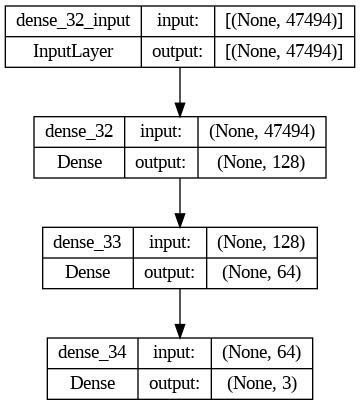

In [ ]:
# get visualization of Neural Network layers (input layer, 2 hidden layers, output layer)
from keras.utils.vis_utils import plot_model
plot_model(nn_model, show_shapes=True)

In [ ]:
train_reviews_transformed.shape

(60000, 47494)

In [ ]:
feature_number

47494

In [ ]:
train_reviews_label.values

array([2, 2, 2, ..., 2, 0, 0])

In [ ]:
tf.keras.utils.to_categorical(train_reviews_label, num_classes=3).shape

(60000, 3)

In [ ]:
# Start time for Neural Network Training
nn_time_start = time.time()

# one hot encoding for keras neural network input
trainY_keras = tf.keras.utils.to_categorical(train_reviews_label, num_classes=3)
testY_keras = tf.keras.utils.to_categorical(test_reviews_label, num_classes=3)

# train neural network for 10 epochs
nn_model.fit(
    train_reviews_transformed,
    trainY_keras,
    epochs=10
)

# elapsed time for svm classifier training
elapsed_time_nn = time.time() - nn_time_start

Epoch 1/10
1875/1875 [==============================] - 172s 91ms/step - loss: 1.0983 - accuracy: 0.3472
Epoch 2/10
1875/1875 [==============================] - 178s 95ms/step - loss: 0.7770 - accuracy: 0.5862
Epoch 3/10
1875/1875 [==============================] - 178s 95ms/step - loss: 0.6650 - accuracy: 0.6068
Epoch 4/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.6632 - accuracy: 0.6024
Epoch 5/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.6621 - accuracy: 0.6057
Epoch 6/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.6590 - accuracy: 0.6040
Epoch 7/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.6578 - accuracy: 0.6055
Epoch 8/10
1875/1875 [==============================] - 196s 104ms/step - loss: 0.6576 - accuracy: 0.6038
Epoch 9/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.6560 - accuracy: 0.6036
Epoch 10/10
1875/1875 [============================

In [ ]:
# time (in seconds) spent for Neural Network training
elapsed_time_nn

1934.067343711853

**Evaluation Phase**

**Evaluation Phase for SVM**

In [ ]:
from sklearn.metrics import accuracy_score

## start time for predicting new reviews (~6000 reviews)
svm_new_start_time = time.time()

# use trained SVM classifier for predicting test reviews
svm_predictions=svm_classifier.predict(test_reviews_transformed)

## elapsed time for predicting new reviews sentiment with SVM
elapsed_time_svm_new = time.time() - svm_new_start_time

# get predictions accuracy score
svm_accuracy_score = accuracy_score(test_reviews_label,svm_predictions)
print(f"SVM Classifier Accuracy Score is: {svm_accuracy_score}")
print(f"Time for predicting {test_reviews_transformed.shape[0]} with SVM is: {elapsed_time_svm_new} seconds")

SVM Classifier Accuracy Score is: 0.37576821773485514
Time for predicting 5695 with SVM is: 34.525606870651245 seconds


In [ ]:
from sklearn.metrics import classification_report
# get classification report
print(classification_report(test_reviews_label,svm_predictions,target_names=['Positive','Negative', "Neutral"]))

              precision    recall  f1-score   support

    Positive       0.49      0.09      0.15      1829
    Negative       0.48      0.08      0.13      1841
     Neutral       0.36      0.91      0.52      2025

    accuracy                           0.38      5695
   macro avg       0.44      0.36      0.27      5695
weighted avg       0.44      0.38      0.27      5695



In [ ]:
from sklearn.metrics import confusion_matrix
# get confusion matrix
svm_cm = confusion_matrix(test_reviews_label, svm_predictions, labels=[0,1,2])
svm_cm

array([[ 158,   59, 1612],
       [  76,  139, 1626],
       [  90,   92, 1843]])

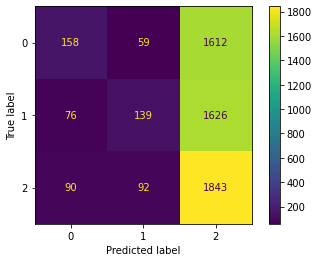

In [ ]:
# visualize confusion matrix for SVM classification
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=[0,1,2])
disp.plot()

**Evaluation Phase for Neural Network**

In [ ]:
from sklearn.metrics import accuracy_score

import numpy as np

## start time for predicting new reviews (~6000 reviews) with Neural Network
nn_new_start_time = time.time()

# use trained SVM classifier for predicting test reviews
nn_predictions_probabilities=nn_model.predict(test_reviews_transformed)
nn_predictions = np.round(nn_predictions_probabilities)

## elapsed time for predicting new reviews sentiment with Neural Network
elapsed_time_nn_new = time.time() - nn_new_start_time

# get predictions accuracy score
print(f"Accuracy Score for Neural Network: {np.mean(nn_predictions == testY_keras)}")
print(f"Time for predicting {test_reviews_transformed.shape[0]} with Neural Network is: {elapsed_time_nn_new} seconds")

178/178 [==============================] - 0s 2ms/step
Accuracy Score for Neural Network: 0.6625109745390694
Time for predicting 5695 with Neural Network is: 0.3873434066772461 seconds


In [ ]:
# get confusion matrix for Neural Network
cf_matrix_nn = confusion_matrix(testY_keras.argmax(axis=1), nn_predictions.argmax(axis=1), normalize='pred')
cf_matrix_nn

array([[0.34119429, 0.22814499, 0.24006623],
       [0.31717871, 0.46055437, 0.26324503],
       [0.341627  , 0.31130064, 0.49668874]])

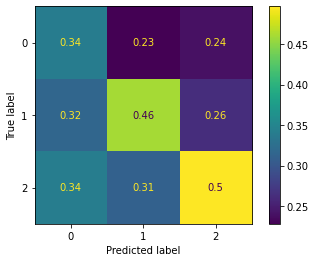

In [ ]:
# Display confusion Matrix for Neural Network
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_nn, display_labels=[0,1,2])
disp_nn.plot()